In [1]:
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [2]:
digits = load_digits()
x_data_all = digits.data
y_data_all  = digits.target
print(x_data_all.shape)
print(y_data_all.shape)

(1797, 64)
(1797,)


In [3]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data_all, y_data_all, random_state=7)
# 划分验证集
x_train, x_valid, y_train,y_valid = train_test_split(
        x_train_all, y_train_all, random_state = 11
)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [4]:
input_wide = keras.layers.Input(shape = [32])
input_deep = keras.layers.Input(shape = [32])
# 开始隐藏层的设计
hidden1 = keras.layers.Dense(30, activation= 'relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)

#固化的操作
model = keras.models.Model(inputs = [input_wide, input_deep], outputs = [output])

#设计目标函数
model.compile(loss  = "mean_squared_error", optimizer = 'sgd')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta= 1e-3)]
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           990         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [8]:
x_train_scaled_wide = x_train_scaled[:,:32]
x_train_scaled_deep = x_train_scaled[:,32:]
x_valid_scaled_wide = x_valid_scaled[:,:32]
x_valid_scaled_deep = x_valid_scaled[:,32:]
x_test_scaled_wide = x_test_scaled[:,:32]
x_test_scaled_deep = x_test_scaled[:,32:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs = 100,
                   callbacks = callbacks)

Train on 1010 samples, validate on 337 samples
Epoch 1/100
1010/1010 [==============================] - 0s 119us/sample - loss: 0.9006 - val_loss: 2.0749
Epoch 2/100
1010/1010 [==============================] - 0s 108us/sample - loss: 0.8999 - val_loss: 2.1001
Epoch 3/100
1010/1010 [==============================] - 0s 104us/sample - loss: 0.8774 - val_loss: 2.0935
Epoch 4/100
1010/1010 [==============================] - 0s 111us/sample - loss: 0.8655 - val_loss: 2.0942
Epoch 5/100
1010/1010 [==============================] - 0s 106us/sample - loss: 0.8550 - val_loss: 1.9894
Epoch 6/100
1010/1010 [==============================] - 0s 109us/sample - loss: 0.8390 - val_loss: 2.0369
Epoch 7/100
1010/1010 [==============================] - 0s 107us/sample - loss: 0.8478 - val_loss: 2.0770
Epoch 8/100
1010/1010 [==============================] - 0s 102us/sample - loss: 0.8178 - val_loss: 2.0992
Epoch 9/100
1010/1010 [==============================] - 0s 104us/sample - loss: 0.7945 - val_los

1010/1010 [==============================] - 0s 113us/sample - loss: 0.4172 - val_loss: 1.9796
Epoch 77/100
1010/1010 [==============================] - 0s 110us/sample - loss: 0.4198 - val_loss: 2.1151
Epoch 78/100
1010/1010 [==============================] - 0s 112us/sample - loss: 0.4085 - val_loss: 1.9155
Epoch 79/100
1010/1010 [==============================] - 0s 107us/sample - loss: 0.4179 - val_loss: 2.2258
Epoch 80/100
1010/1010 [==============================] - 0s 101us/sample - loss: 0.4299 - val_loss: 1.9162
Epoch 81/100
1010/1010 [==============================] - 0s 102us/sample - loss: 0.4160 - val_loss: 1.8860
Epoch 82/100
1010/1010 [==============================] - 0s 101us/sample - loss: 0.3918 - val_loss: 1.8714
Epoch 83/100
1010/1010 [==============================] - 0s 102us/sample - loss: 0.4078 - val_loss: 1.8857
Epoch 84/100
1010/1010 [==============================] - 0s 103us/sample - loss: 0.4112 - val_loss: 2.1756
Epoch 85/100
1010/1010 [=================

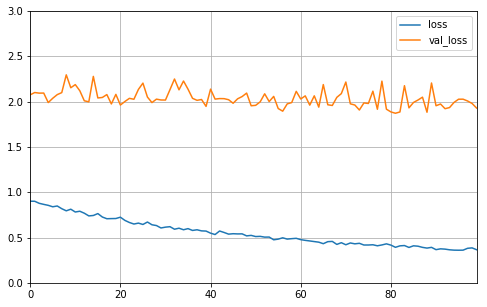

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
plot_learning_curves(history)